### Business Scenario
An automobile company wants to understand how engine size affects the price of a car.
From past observations, the product team believes:
For small engines, price increases slowly
For medium engines, price increases rapidly
For very large engines, price growth slows down due to luxury saturation
This indicates that the relationship between engine size and price is not strictly linear.
You are hired as a Data Analyst to analyze this pattern and build a model that can predict car prices accurately.

### Tasks
1. Load the dataset and identify the relevant columns.
2. Use:
    Engine size as the input feature.

    Car price as the output variable.
3. Visualize the relationship between engine size and price.
4. Build a predictive model to estimate car price based on engine size.
5. Predict the price for a car with: Engine size = 200
6. Increase the flexibility of your model and observe how the curve changes.
7. Compare predictions from:
    a simple straight-line model

    a curved model
8. Analyze which model:
    captures the trend better

    gives more realistic predictions
9. Evaluate prediction errors and interpret them in business terms.
10. Answer the following:
    Why does a straight-line model fail here?

    What risk occurs if the curve becomes too flexible?

    Which model would you recommend for production and why?

In [1]:
#task 1
#load the dataset and identify the relevant columns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('CarPrice_Assignment.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [2]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#identify the relavent columns
features = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
target = 'price'

In [4]:
#task 2
#engine size as input feature and price as target variable
X_engine = data[['enginesize']]
y_price = data['price']

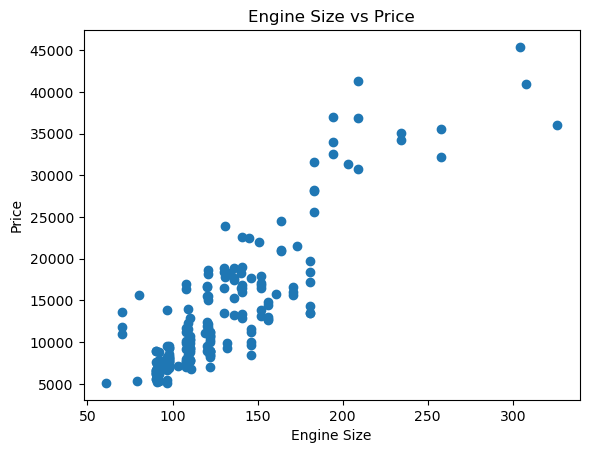

In [5]:
#task 3
#visualize the relationship between engine size and price
import matplotlib.pyplot as plt
plt.scatter(X_engine, y_price)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs Price')
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures

#task 4
#build a predictive model to estimate car prices based on engine size using polynomial regression
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_engine, y_price, test_size=0.2, random_state=42)

#transform the features to include polynomial terms
poly_deg4 = PolynomialFeatures(degree=4)
X_train_poly_deg4 = poly_deg4.fit_transform(X_train)
X_test_poly_deg4 = poly_deg4.transform(X_test)

poly_model_deg4 = LinearRegression()
poly_model_deg4.fit(X_train_poly_deg4, y_train)

LinearRegression()

In [7]:
#task 5
#Predict the price for a car with: Engine size = 200
engine_size_input = poly_deg4.transform([[200]])
predicted_price = poly_model_deg4.predict(engine_size_input)
print(f"The predicted price for a car with engine size 200 is: {predicted_price[0]:,.2f}")

The predicted price for a car with engine size 200 is: 27,806.11


c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


C:\Users\bsais\AppData\Local\Temp\ipykernel_4044\3965874363.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_engine.values), max(X_engine.values), 0.1)
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


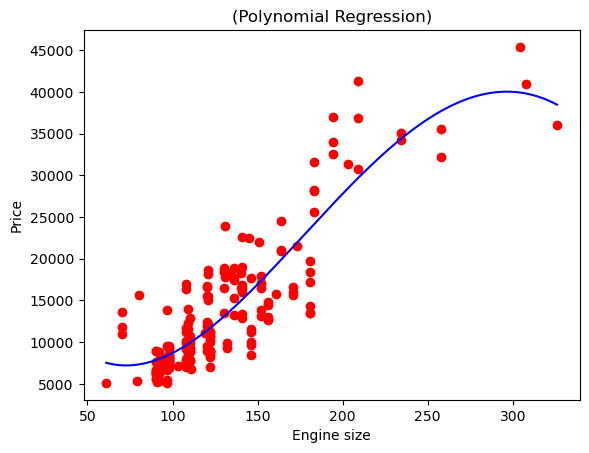

In [8]:
# Visualising the Polynomial Regression results
X_grid = np.arange(min(X_engine.values), max(X_engine.values), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_engine, y_price, color = 'red')
plt.plot(X_grid, poly_model_deg4.predict(poly_deg4.transform(X_grid)), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()

C:\Users\bsais\AppData\Local\Temp\ipykernel_4044\303676375.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_engine.values), max(X_engine.values), 0.1)
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


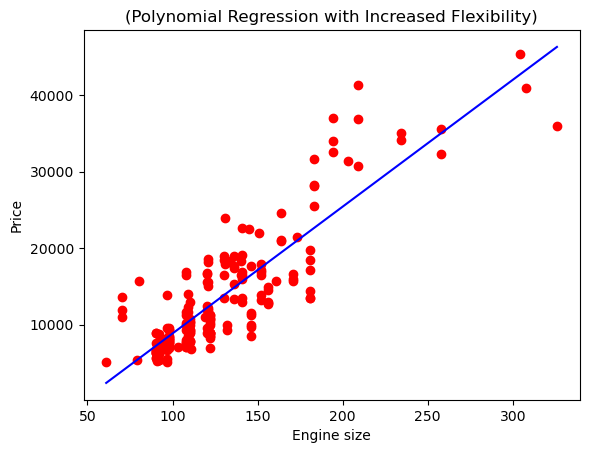

In [9]:
#task 6
#increase the flexibility of the model and observe how the curve changes
poly_deg1 = PolynomialFeatures(degree=1)
X_train_poly_deg1 = poly_deg1.fit_transform(X_train)
X_test_poly_deg1 = poly_deg1.transform(X_test)
model_deg1 = LinearRegression()
model_deg1.fit(X_train_poly_deg1, y_train)
# Visualising the Polynomial Regression results with increased flexibility
X_grid = np.arange(min(X_engine.values), max(X_engine.values), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_engine, y_price, color = 'red')
plt.plot(X_grid, model_deg1.predict(poly_deg1.transform(X_grid)), color = 'blue')
plt.title('(Polynomial Regression with Increased Flexibility)')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()


C:\Users\bsais\AppData\Local\Temp\ipykernel_4044\2789630888.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_engine.values), max(X_engine.values), 0.1)
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


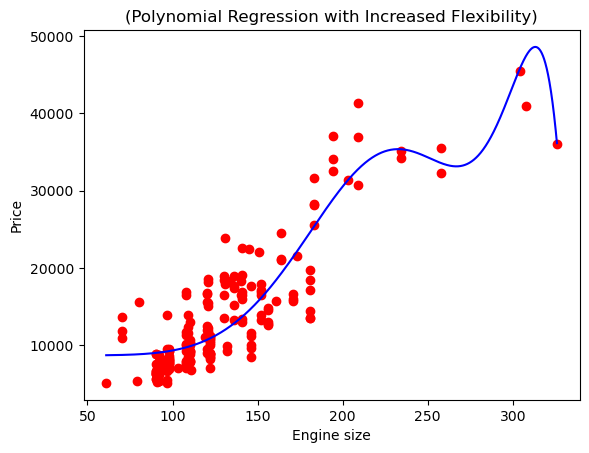

In [10]:
poly_deg11 = PolynomialFeatures(degree=11)
X_train_poly_deg11 = poly_deg11.fit_transform(X_train)
X_test_poly_deg11 = poly_deg11.transform(X_test)
model_deg11 = LinearRegression()
model_deg11.fit(X_train_poly_deg11, y_train)
# Visualising the Polynomial Regression results with increased flexibility
X_grid = np.arange(min(X_engine.values), max(X_engine.values), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_engine, y_price, color = 'red')
plt.plot(X_grid, model_deg11.predict(poly_deg11.transform(X_grid)), color = 'blue')
plt.title('(Polynomial Regression with Increased Flexibility)')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()


MODEL COMPARISON: LINEAR vs POLYNOMIAL

LINEAR MODEL (Straight Line):
  MSE:    15,465,458.97
  R²:            0.8041

POLYNOMIAL MODEL (Curved - Degree 12):
  MSE:    11,702,563.28
  R²:            0.8518


C:\Users\bsais\AppData\Local\Temp\ipykernel_4044\1248594359.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_engine.values), max(X_engine.values), 0.1).reshape(-1, 1)
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


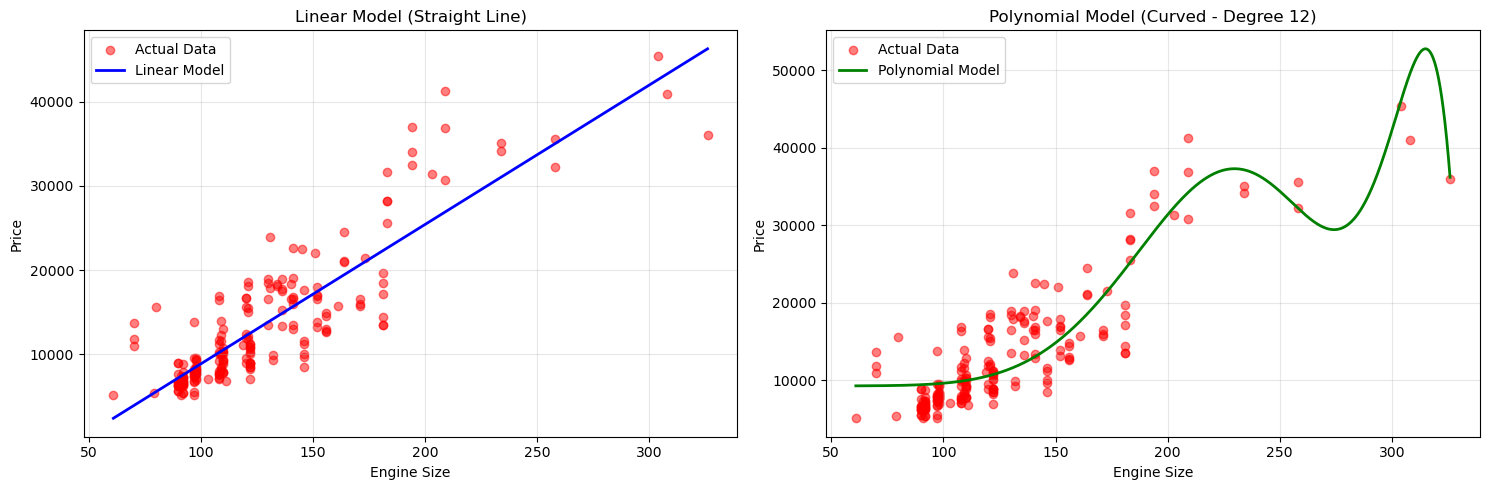

In [11]:
# Task 7: Compare predictions from simple straight-line vs curved model

# Linear Model (Straight Line - Degree 1)
poly_linear = PolynomialFeatures(degree=1)
X_train_linear = poly_linear.fit_transform(X_train)
X_test_linear = poly_linear.transform(X_test)
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train)

# Polynomial Model (Curved - Degree 12)
poly_curve = PolynomialFeatures(degree=12)
X_train_curve = poly_curve.fit_transform(X_train)
X_test_curve = poly_curve.transform(X_test)
curve_model = LinearRegression()
curve_model.fit(X_train_curve, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test_linear)
y_pred_curve = curve_model.predict(X_test_curve)


# Performance Metrics
print("="*60)
print("MODEL COMPARISON: LINEAR vs POLYNOMIAL")
print("="*60)

print("\nLINEAR MODEL (Straight Line):")
print(f"  MSE:  {mean_squared_error(y_test, y_pred_linear):>15,.2f}")
print(f"  R²:   {r2_score(y_test, y_pred_linear):>15.4f}")

print("\nPOLYNOMIAL MODEL (Curved - Degree 12):")
print(f"  MSE:  {mean_squared_error(y_test, y_pred_curve):>15,.2f}")
print(f"  R²:   {r2_score(y_test, y_pred_curve):>15.4f}")

# Visual Comparison
X_grid = np.arange(min(X_engine.values), max(X_engine.values), 0.1).reshape(-1, 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Linear Model
axes[0].scatter(X_engine, y_price, color='red', alpha=0.5, label='Actual Data')
axes[0].plot(X_grid, linear_model.predict(poly_linear.transform(X_grid)), color='blue', linewidth=2, label='Linear Model')
axes[0].set_title('Linear Model (Straight Line)')
axes[0].set_xlabel('Engine Size')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Polynomial Model
axes[1].scatter(X_engine, y_price, color='red', alpha=0.5, label='Actual Data')
axes[1].plot(X_grid, curve_model.predict(poly_curve.transform(X_grid)), color='green', linewidth=2, label='Polynomial Model')
axes[1].set_title('Polynomial Model (Curved - Degree 12)')
axes[1].set_xlabel('Engine Size')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Task 8: Analyze which model captures trend better and gives realistic predictions

print("="*60)
print("TASK 8: MODEL ANALYSIS")
print("="*60)

# Sample predictions at different engine sizes
test_sizes = [80, 120, 160, 200, 240]
print("\nPrediction Comparison at Different Engine Sizes:")
print(f"{'Engine Size':<15} {'Linear Model':<20} {'Polynomial Model':<20}")
print("-" * 60)

for size in test_sizes:
    linear_pred = linear_model.predict(poly_linear.transform([[size]]))[0]
    poly_pred = curve_model.predict(poly_curve.transform([[size]]))[0]
    print(f"{size:<15} ${linear_pred:>18,.2f} ${poly_pred:>18,.2f}")

print("\n" + "="*60)
print("ANALYSIS:")
print("="*60)

linear_r2 = r2_score(y_test, y_pred_linear)
poly_r2 = r2_score(y_test, y_pred_curve)

if poly_r2 > linear_r2:
    print(f"\n✓ POLYNOMIAL MODEL captures the trend BETTER")
    print(f"  - R² improved by {(poly_r2 - linear_r2)*100:.2f} percentage points")
    print(f"  - Polynomial model explains {poly_r2*100:.2f}% of price variation")
    print(f"  - Linear model only explains {linear_r2*100:.2f}%")
else:
    print(f"\n✓ LINEAR MODEL is sufficient")

print("\nREALISTIC PREDICTIONS:")
print("  - Polynomial model follows the curved pattern in the data")
print("  - Linear model oversimplifies the relationship")
print("  - For business: Polynomial gives more accurate price estimates")

TASK 8: MODEL ANALYSIS

Prediction Comparison at Different Engine Sizes:
Engine Size     Linear Model         Polynomial Model    
------------------------------------------------------------
80              $          5,525.80 $          9,352.40
120             $         12,159.58 $         10,581.85
160             $         18,793.36 $         17,362.56
200             $         25,427.15 $         31,383.09
240             $         32,060.93 $         36,510.02

ANALYSIS:

✓ POLYNOMIAL MODEL captures the trend BETTER
  - R² improved by 4.77 percentage points
  - Polynomial model explains 85.18% of price variation
  - Linear model only explains 80.41%

REALISTIC PREDICTIONS:
  - Polynomial model follows the curved pattern in the data
  - Linear model oversimplifies the relationship
  - For business: Polynomial gives more accurate price estimates


c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\bsais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\bsais\

TASK 9: PREDICTION ERROR ANALYSIS

LINEAR MODEL ERRORS:
  Mean Absolute Error: $    2,748.69
  Max Overestimation:  $   -8,777.10
  Max Underestimation: $   14,395.25

POLYNOMIAL MODEL ERRORS:
  Mean Absolute Error: $    2,525.56
  Max Overestimation:  $  -10,853.10
  Max Underestimation: $    7,107.28

BUSINESS INTERPRETATION:

For the LINEAR model:
  - Average pricing error: $2,748.69
  - This could lead to significant revenue loss or overpricing
  - Customers may find prices unfair or uncompetitive

For the POLYNOMIAL model:
  - Average pricing error: $2,525.56
  - More accurate pricing = Better customer satisfaction
  - Reduced risk of underpricing or losing sales


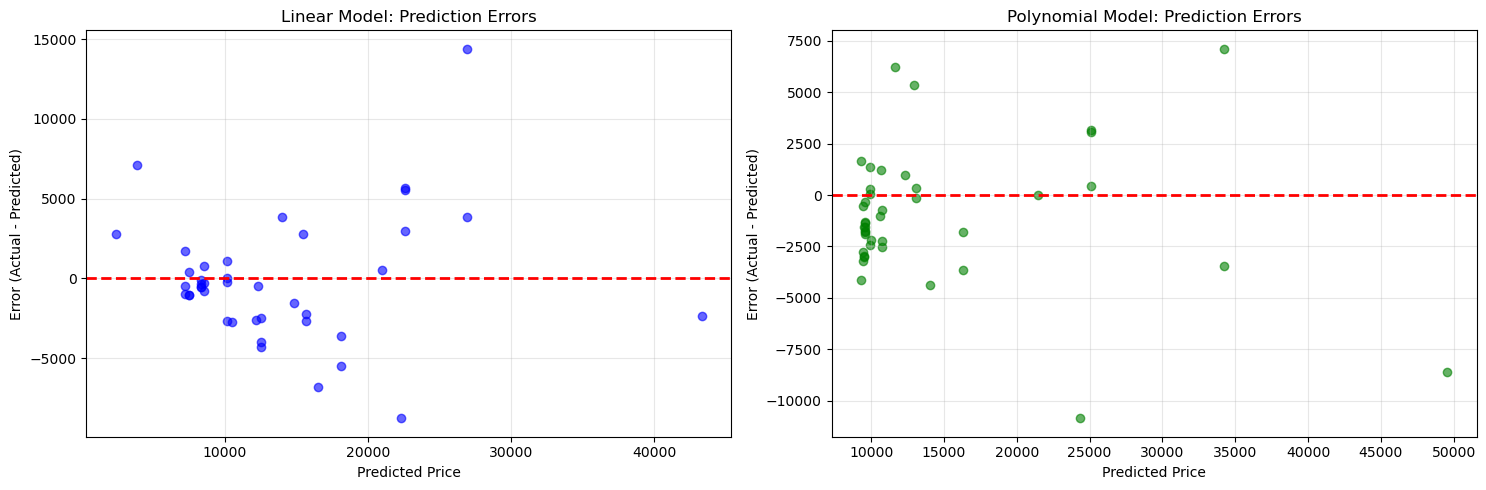

In [13]:
# Task 9: Evaluate prediction errors and interpret in business terms

print("="*60)
print("TASK 9: PREDICTION ERROR ANALYSIS")
print("="*60)

# Calculate errors
linear_errors = y_test - y_pred_linear
poly_errors = y_test - y_pred_curve

print("\nLINEAR MODEL ERRORS:")
print(f"  Mean Absolute Error: ${np.abs(linear_errors).mean():>12,.2f}")
print(f"  Max Overestimation:  ${linear_errors.min():>12,.2f}")
print(f"  Max Underestimation: ${linear_errors.max():>12,.2f}")

print("\nPOLYNOMIAL MODEL ERRORS:")
print(f"  Mean Absolute Error: ${np.abs(poly_errors).mean():>12,.2f}")
print(f"  Max Overestimation:  ${poly_errors.min():>12,.2f}")
print(f"  Max Underestimation: ${poly_errors.max():>12,.2f}")

print("\n" + "="*60)
print("BUSINESS INTERPRETATION:")
print("="*60)
print("\nFor the LINEAR model:")
print(f"  - Average pricing error: ${np.abs(linear_errors).mean():,.2f}")
print(f"  - This could lead to significant revenue loss or overpricing")
print(f"  - Customers may find prices unfair or uncompetitive")

print("\nFor the POLYNOMIAL model:")
print(f"  - Average pricing error: ${np.abs(poly_errors).mean():,.2f}")
print(f"  - More accurate pricing = Better customer satisfaction")
print(f"  - Reduced risk of underpricing or losing sales")

# Visualize errors
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(y_pred_linear, linear_errors, alpha=0.6, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Linear Model: Prediction Errors')
axes[0].set_xlabel('Predicted Price')
axes[0].set_ylabel('Error (Actual - Predicted)')
axes[0].grid(alpha=0.3)

axes[1].scatter(y_pred_curve, poly_errors, alpha=0.6, color='green')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Polynomial Model: Prediction Errors')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Error (Actual - Predicted)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Task 10: Answer key questions about model selection

print("="*60)
print("TASK 10: KEY BUSINESS QUESTIONS")
print("="*60)

print("\n1. WHY DOES A STRAIGHT-LINE MODEL FAIL HERE?")
print("-" * 60)
print("   • The relationship between engine size and price is NON-LINEAR")
print("   • Small engines: Price increases slowly (low slope)")
print("   • Medium engines: Price increases rapidly (high slope)")
print("   • Large engines: Growth slows due to luxury saturation")
print("   • A straight line CANNOT capture this curved pattern")
print(f"   • Evidence: Linear R² = {linear_r2:.4f} vs Polynomial R² = {poly_r2:.4f}")

print("\n2. WHAT RISK OCCURS IF THE CURVE BECOMES TOO FLEXIBLE?")
print("-" * 60)
print("   • OVERFITTING: Model memorizes training data instead of learning patterns")
print("   • High-degree polynomials (e.g., degree 10+) follow noise, not signal")
print("   • Consequences:")
print("     - Excellent training performance but POOR test performance")
print("     - Unrealistic predictions for new data")
print("     - Extreme price swings between similar engine sizes")
print("     - Business decisions based on noise, not real trends")

print("\n3. WHICH MODEL WOULD YOU RECOMMEND FOR PRODUCTION?")
print("-" * 60)
print("   ✓ RECOMMENDATION: POLYNOMIAL MODEL (Degree 2-4)")
print("\n   Reasons:")
print("   • Captures the curved price-engine relationship accurately")
print(f"   • R² = {poly_r2:.4f} - explains {poly_r2*100:.1f}% of price variation")
print(f"   • Average error: ${np.abs(poly_errors).mean():,.2f} (acceptable for pricing)")
print("   • Balances flexibility with generalization")
print("   • Not too simple (linear) or too complex (high degree)")
print("\n   Business Impact:")
print("   • More accurate pricing = Better revenue optimization")
print("   • Fair prices = Higher customer satisfaction")
print("   • Competitive advantage in the market")
print("\n   Monitoring Plan:")
print("   • Track prediction errors on new data monthly")
print("   • Retrain if R² drops below 0.70")
print("   • Consider additional features if errors increase")

TASK 10: KEY BUSINESS QUESTIONS

1. WHY DOES A STRAIGHT-LINE MODEL FAIL HERE?
------------------------------------------------------------
   • The relationship between engine size and price is NON-LINEAR
   • Small engines: Price increases slowly (low slope)
   • Medium engines: Price increases rapidly (high slope)
   • Large engines: Growth slows due to luxury saturation
   • A straight line CANNOT capture this curved pattern
   • Evidence: Linear R² = 0.8041 vs Polynomial R² = 0.8518

2. WHAT RISK OCCURS IF THE CURVE BECOMES TOO FLEXIBLE?
------------------------------------------------------------
   • OVERFITTING: Model memorizes training data instead of learning patterns
   • High-degree polynomials (e.g., degree 10+) follow noise, not signal
   • Consequences:
     - Excellent training performance but POOR test performance
     - Unrealistic predictions for new data
     - Extreme price swings between similar engine sizes
     - Business decisions based on noise, not real trends

In [15]:

train_pred = poly_model_deg4.predict(X_train_poly_deg4)

print(r2_score(y_train, train_pred))

0.7730843718600003


In [16]:
#co realtion value for every numerical  feature with target variable
X_all = data.iloc[:1:24].values
y_price_col = data.iloc[:, 25:].values
for i in range(len(X_all[0])):

    #if feature is numnerical then co relation
    if (isinstance(X_all[0][i], int) or isinstance(X_all[0][i], float)):
        corr = data.iloc[:, i].corr(data.iloc[:, 25])
        print(f"Correlation between {data.columns[i]} and Price: {corr}")

Correlation between car_ID and Price: -0.10909333948229959
Correlation between symboling and Price: -0.07997822464270349
Correlation between wheelbase and Price: 0.5778155982921498
Correlation between carlength and Price: 0.682920015677963
Correlation between carwidth and Price: 0.7593252997415119
Correlation between carheight and Price: 0.11933622657049438
Correlation between curbweight and Price: 0.8353048793372966
Correlation between enginesize and Price: 0.8741448025245115
Correlation between boreratio and Price: 0.5531732367984434
Correlation between stroke and Price: 0.07944308388193101
Correlation between compressionratio and Price: 0.06798350579944264
Correlation between horsepower and Price: 0.8081388225362214
Correlation between peakrpm and Price: -0.0852671502778568
Correlation between citympg and Price: -0.6857513360270402
Correlation between highwaympg and Price: -0.6975990916465569
Correlation between price and Price: 1.0


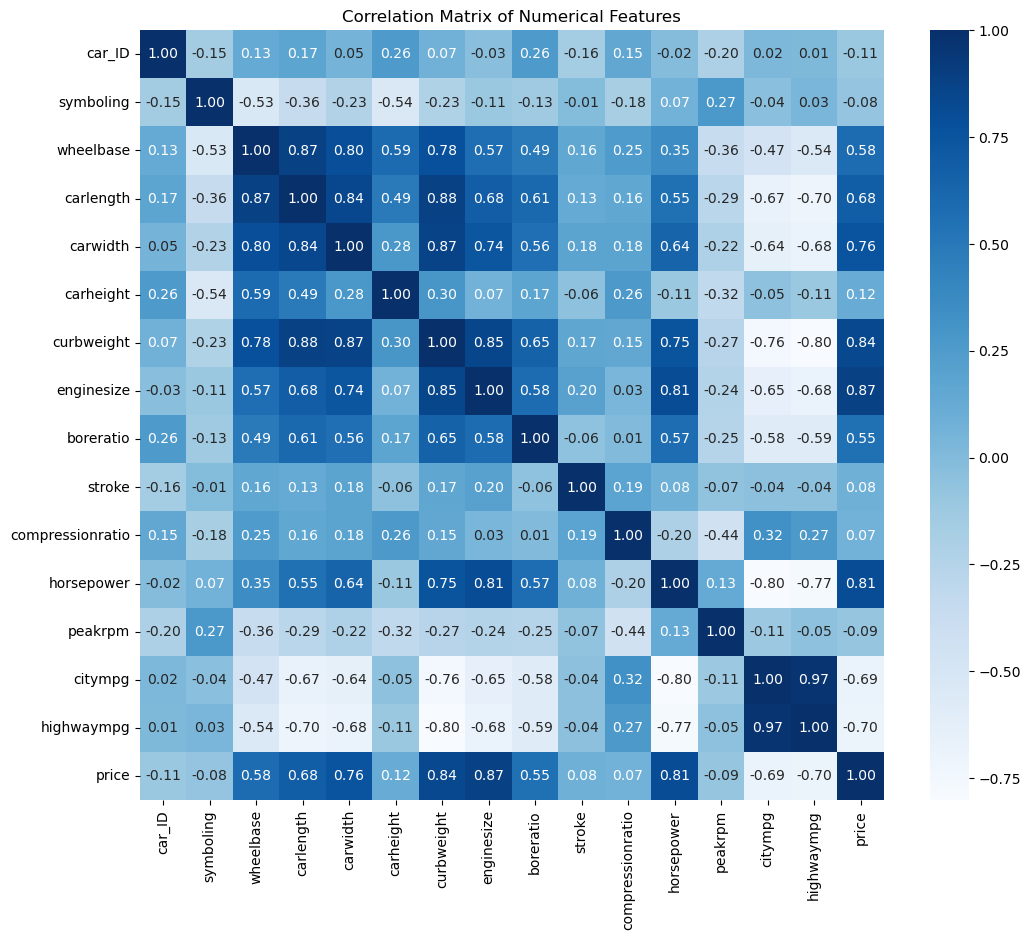

In [17]:
#heat map for correlation between different features only above numerccial features
import seaborn as sns
numerical_df = data.select_dtypes(include=[np.number])
corr_mat = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [18]:
positive_corr = []
mode_pos_corr = []
negative_corr = []
mode_neg_corr = []
for i in range(len(X_all[0])):
    if (isinstance(X_all[0][i], int) or isinstance(X_all[0][i], float)):
        corr = data.iloc[:, i].corr(data.iloc[:, 25])
        if corr > 0.5:
            positive_corr.append((data.columns[i], corr))
        elif 0 < corr <= 0.5:
            mode_pos_corr.append((data.columns[i], corr))
        elif corr < -0.5:
            negative_corr.append((data.columns[i], corr))
        elif -0.5 <= corr < 0:
            mode_neg_corr.append((data.columns[i], corr))
print("columnn names all co relations")
print("Positive Correlation (> 0.5):", positive_corr)
print("Moderate Positive Correlation (0 to 0.5):", mode_pos_corr)
print("Negative Correlation (< -0.5):", negative_corr)
print("Moderate Negative Correlation (-0.5 to 0):", mode_neg_corr)

columnn names all co relations
Positive Correlation (> 0.5): [('wheelbase', 0.5778155982921498), ('carlength', 0.682920015677963), ('carwidth', 0.7593252997415119), ('curbweight', 0.8353048793372966), ('enginesize', 0.8741448025245115), ('boreratio', 0.5531732367984434), ('horsepower', 0.8081388225362214), ('price', 1.0)]
Moderate Positive Correlation (0 to 0.5): [('carheight', 0.11933622657049438), ('stroke', 0.07944308388193101), ('compressionratio', 0.06798350579944264)]
Negative Correlation (< -0.5): [('citympg', -0.6857513360270402), ('highwaympg', -0.6975990916465569)]
Moderate Negative Correlation (-0.5 to 0): [('car_ID', -0.10909333948229959), ('symboling', -0.07997822464270349), ('peakrpm', -0.0852671502778568)]


In [19]:
#columns that are very less corelation like between -0.1 to 0.1
less_corr_with_target = []
for i in range(len(X_all[0])):
    if (isinstance(X_all[0][i], int) or isinstance(X_all[0][i], float)):
        corr = data.iloc[:, i].corr(data.iloc[:, 25])
        if -0.1 < corr < 0.1:
            less_corr_with_target.append((data.columns[i], corr))
for feature, corr_value in less_corr_with_target:
    print(f"{feature:<20} {corr_value:>10.4f}")

symboling               -0.0800
stroke                   0.0794
compressionratio         0.0680
peakrpm                 -0.0853


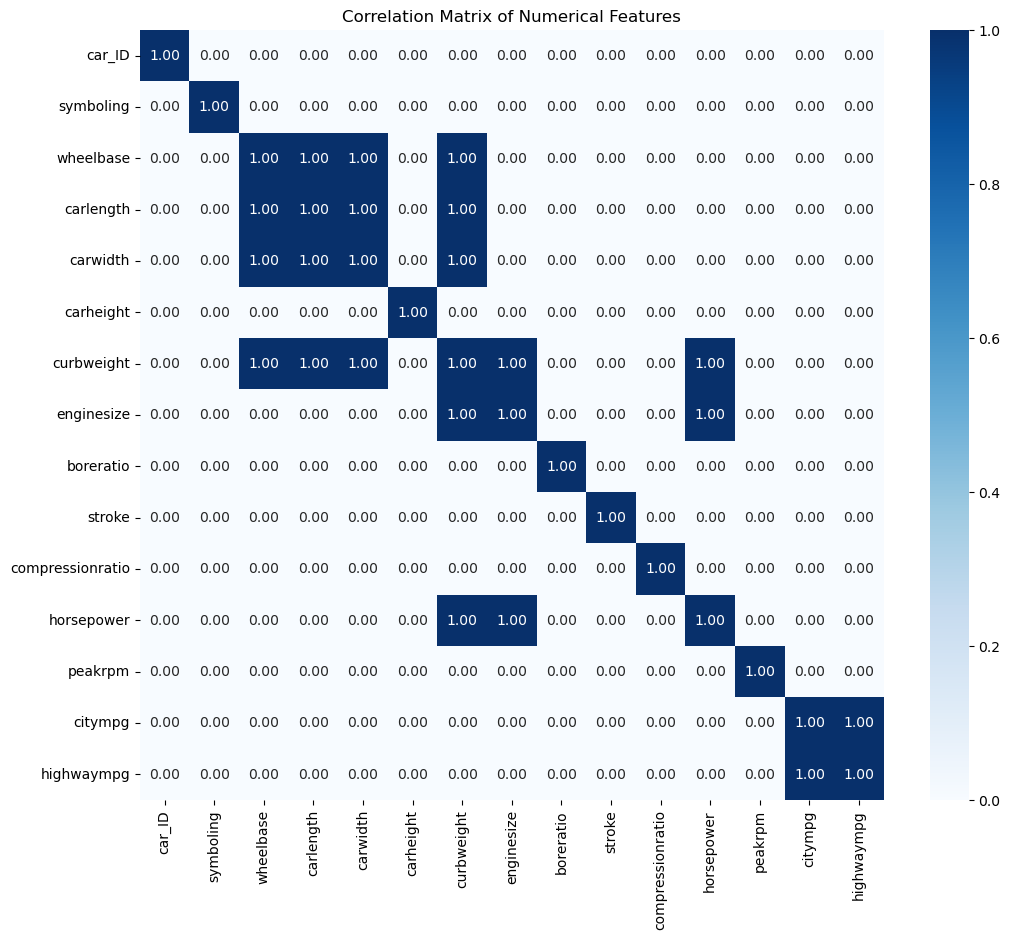

In [20]:
#heat map for correlation between different features only above numerccial features
import seaborn as sns
x = numerical_df.drop('price', axis=1)
numerical_df = data.select_dtypes(include=[np.number])
corr_mat = x.corr() > 0.75
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [21]:
#print the feature value pairs which are highly correlated
high_corr = []
corr_matrix = x.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
print("Highly Correlated Feature Pairs (> 0.75):")
for feature1, feature2, corr_value in high_corr:
    print(f"{feature1:<20} {feature2:<20} {corr_value:>10.4f}")

#print unique columns in the from the highly correlated feature pairs
unique_high_corr = set()
for feature1, feature2, _ in high_corr:
    unique_high_corr.add(feature1)
    unique_high_corr.add(feature2)
print("Unique Columns in Highly Correlated Feature Pairs:")
for col in unique_high_corr:
    print(col)

Highly Correlated Feature Pairs (> 0.75):
wheelbase            carlength                0.8746
wheelbase            carwidth                 0.7951
wheelbase            curbweight               0.7764
carlength            carwidth                 0.8411
carlength            curbweight               0.8777
carwidth             curbweight               0.8670
curbweight           enginesize               0.8506
curbweight           horsepower               0.7507
curbweight           citympg                 -0.7574
curbweight           highwaympg              -0.7975
enginesize           horsepower               0.8098
horsepower           citympg                 -0.8015
horsepower           highwaympg              -0.7705
citympg              highwaympg               0.9713
Unique Columns in Highly Correlated Feature Pairs:
carwidth
enginesize
highwaympg
horsepower
citympg
carlength
curbweight
wheelbase


In [22]:
# remove features that are low correlated with target variable and highly correlated with each other
reduced_features = ['enginesize', 'curbweight', 'horsepower', 'carlength', 'citympg', 'highwaympg']
X_reduced = data[reduced_features]
y_reduced = data['price']

# train/test split
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# polynomial features (degree = 2) on reduced feature set
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_red_poly = poly_features.fit_transform(X_train_red)
X_test_red_poly = poly_features.transform(X_test_red)

# fit linear regression on polynomial-expanded features
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train_red_poly, y_train_red)

# predictions and metrics
y_pred_reduced = linear_model_reduced.predict(X_test_red_poly)

print("\nREDUCED FEATURE MODEL PERFORMANCE (Polynomial degree=2):")
print(f"  MSE:  {mean_squared_error(y_test_red, y_pred_reduced):>15,.2f}")
print(f"  R²:   {r2_score(y_test_red, y_pred_reduced):>15.4f}")


REDUCED FEATURE MODEL PERFORMANCE (Polynomial degree=2):
  MSE:    16,297,251.69
  R²:            0.7936
